# Almemo - Data Analysis

- Data Wrangling:
 - read data: combine to one file
 - handle missing/wrong data; gaps in time series?!

- Data analysis:
 - extract specific data (days, time, specific values/ranges)
 - resampling (hours, cumulative sum,...)
 
 
 
 
- TODO: 
  - Modules for Functions
  - Modules for plot-settings

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()
import datetime 
from datetime import datetime
import glob


from IPython.core.interactiveshell import InteractiveShell

#InteractiveShell.ast_node_interactivity = "all"

# I. Store all .txt files in one file


DatetimeIndex always better / more comfortable -> use Timestamp! 

https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

In [2]:
%pwd

'H:\\Python_Code\\Plot_'

In [3]:
# combine all day-files to one single file

pattern = 'H:/Python_Code/Plot_/data_almemo/*.txt'
txt_files = glob.glob(pattern)

frames = []

# use parse_dates=True for Datetime Index working in pandas
# use index_col='Timestamp' for timestamp instead of indices
for txt in txt_files:  
    df = pd.read_csv(txt,delimiter=';', skiprows=[0], names=['Timestamp', 'Epoch', 'OutsideVert', 
                                                             'OutsideHor', 'InsideCeiling', 'InsideTable', 
                                                             'InsideWork', 'InsideEye', 'new','InsideTable2', 
                                                             'InsideWork2'],index_col='Timestamp', 
                     parse_dates=True, dayfirst = True)
    
    frames.append(df)
    
df = pd.concat(frames)
df.to_csv("H:/Python_Code/Plot_/Almemo_data.csv", sep=';', encoding='utf-8')


display(df.head(3))
display(df.tail(3))

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2018-10-18 08:02:36,1539842556560,1870,3530,12,37,12,23,NaN,NaN,NaN
2018-10-18 08:58:52,1539845932939,5840,10090,29,78,39,47,NaN,NaN,NaN
2018-10-18 08:59:56,1539845996909,5910,10240,34,79,41,48,NaN,NaN,NaN


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-12 14:38:36,1562935116879,7270,19170,31.27,96.9,47.2,71,40,96.86,47.16
2019-07-12 14:39:46,1562935186877,7230,20020,30.86,94.7,46.1,67,32,94.74,46.07
2019-07-12 14:40:56,1562935256876,7190,20550,30.55,93.4,45.4,70,34,93.41,45.39


In [4]:
# Show data-frame type
print('Dataframe (type, dtypes, shape): ')
print('----------------------------------')
display(type(df))
display(df.dtypes)
display(df.shape)

print('Index: ')
print('----------------------------------')
display(df.index)

Dataframe (type, dtypes, shape): 
----------------------------------


pandas.core.frame.DataFrame

Epoch             int64
OutsideVert      object
OutsideHor       object
InsideCeiling    object
InsideTable      object
InsideWork       object
InsideEye        object
new              object
InsideTable2     object
InsideWork2      object
dtype: object

(345555, 10)

Index: 
----------------------------------


DatetimeIndex(['2018-10-18 08:02:36', '2018-10-18 08:58:52',
               '2018-10-18 08:59:56', '2018-10-18 09:01:06',
               '2018-10-18 09:02:16', '2018-10-18 09:03:26',
               '2018-10-18 09:04:36', '2018-10-18 09:05:46',
               '2018-10-18 09:06:56', '2018-10-18 09:08:06',
               ...
               '2019-07-12 14:30:46', '2019-07-12 14:31:46',
               '2019-07-12 14:32:56', '2019-07-12 14:33:56',
               '2019-07-12 14:35:06', '2019-07-12 14:36:16',
               '2019-07-12 14:37:26', '2019-07-12 14:38:36',
               '2019-07-12 14:39:46', '2019-07-12 14:40:56'],
              dtype='datetime64[ns]', name='Timestamp', length=345555, freq=None)

# II. Teildaten auswählen

- Tagesdatei
- Nur beide Außenwerte
- Tagesdatei mit out/in Verhältnis

## Tagesdatei - exemplarisch:

In [5]:
# extract one day: 
df_20190709 = df.loc["2019-07-09"]
display(df_20190709.head(2))
display(df_20190709.tail(2))

# select specific columns:
# df_20190709_out = df_20190709[['OutsideVert','OutsideHor']]
# df_20190709_out.head()

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-09 00:00:31,1562623231363,10,0,0.03,0,0,32,3,0,0
2019-07-09 00:01:31,1562623291364,10,0,0.03,0,0,24,3,0,0


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-09 23:57:59,1562709479978,10,0,0.03,0,0,31,3,0,0
2019-07-09 23:58:59,1562709539978,10,0,0.03,0,0,26,3,0,0


Text(0.5, 0, 'Zeit')

Text(0, 0.5, 'Beleuchtungsstärke [lux]')

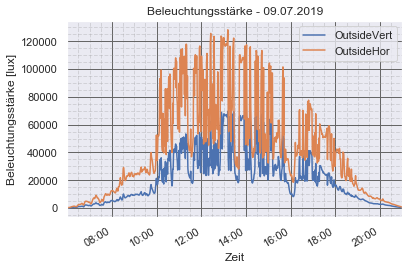

In [44]:
# plot specific timespan on specific day:

ax = df.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00'].plot(
    y=['OutsideVert','OutsideHor'],grid=True,title = 'Beleuchtungsstärke - 09.07.2019' )

ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

# ----------------------------------------------------------------------------------
# Show major grid lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)

# ----------------------------------------------------------------------------------
# Formatting Date values at x-axis
# https://matplotlib.org/api/dates_api.html

myFmt = myFmt = DateFormatter("%H:%M") # "%m/%d"
ax.xaxis.set_major_formatter(myFmt)

**Define Plot-Function for Day-specific plot**

Arguments: 
- x-axis range with start and end: e.g. start = pd.Timestamp(2019, 5, 5, 4) 
- y-axis maximum value: e.g. 25000 
- various arguments which sensor value to plot: e.g. 'OutsideHor', 'OutsideVat', 'InsideWork'


HELP:
https://stackoverflow.com/questions/48790378/how-to-get-ticks-every-hour

In [7]:
def day_plt(start, end, max, *args):
    try:
        arg_lst = []
        for i, arg in enumerate(args):
            arg_lst.append(arg)
        ax = df.loc[start:end].plot(y=arg_lst,grid=True,figsize=(15,10),title = 'Beleuchtungsstärke')
    except:
        print("Irgednwas is komisch: ", arg_lst)
        
    ax.set_xlabel("Zeit")
    ax.set_ylabel("Beleuchtungsstärke [lux]")
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.3)
    myFmt = myFmt = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(myFmt)
    ax.set_ylim(-2, max)

# III. Resample:

- Type casting to resample: object to float64

- resample for e.g. cumsum / max / ...

In [277]:
# type casting:

df0 = df.apply(pd.to_numeric, errors='coerce')

#remove epoc column
df0 = df0.drop(columns=['Epoch','new'],axis=1)

df0.to_csv("H:/Python_Code/Plot_/Almemo_data_res.csv", sep=';', encoding='utf-8')

# errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
# - If ‘raise’, then invalid parsing will raise an exception
# - If ‘coerce’, then invalid parsing will be set as NaN
# - If ‘ignore’, then invalid parsing will return the input

# Alternative (column-wise):
# df_20190709_out['OutsideVert'] = df_20190709_out.OutsideVert.astype(float)


display(df.dtypes.head(3))
display(df0.dtypes)
display(df0.head())

Epoch           int64
OutsideVert    object
OutsideHor     object
dtype: object

OutsideVert      float64
OutsideHor       float64
InsideCeiling    float64
InsideTable      float64
InsideWork       float64
InsideEye        float64
InsideTable2     float64
InsideWork2      float64
dtype: object

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2
Timestamp,,,,,,,,
2018-10-18 08:02:36,1870.0,3530.0,12.0,37.0,12.0,23.0,NaN,NaN
2018-10-18 08:58:52,5840.0,10090.0,29.0,78.0,39.0,47.0,NaN,NaN
2018-10-18 08:59:56,5910.0,10240.0,34.0,79.0,41.0,48.0,NaN,NaN
2018-10-18 09:01:06,6070.0,10570.0,34.0,81.0,43.0,49.0,NaN,NaN
2018-10-18 09:02:16,6250.0,10850.0,24.0,79.0,46.0,49.0,NaN,NaN


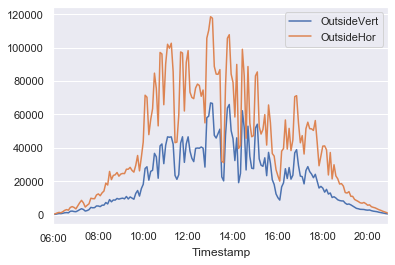

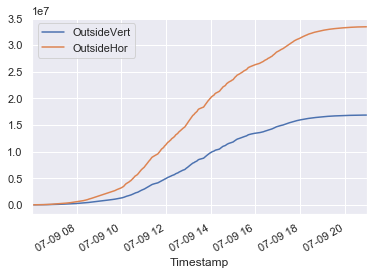

In [278]:
# resample

df_res = df0.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00'][['OutsideVert','OutsideHor']].resample('5min').mean()

df_res.plot(grid = True)

#plt.grid(b=True, which='major', color='#666666', linestyle='-')
#plt.minorticks_on()
#plt.grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.6)
#myFmt = myFmt = DateFormatter("%H:%M") # "%m/%d"
#ax.xaxis.set_major_formatter(myFmt)

df_res2 = df0.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00'][['OutsideVert','OutsideHor']].cumsum()
df_res2.plot(grid = True)

#### COMPARISON: As panda.core.series.Series - Format

Timestamp
2018-10-18 08:02:36    12
2018-10-18 08:58:52    29
2018-10-18 08:59:56    34
2018-10-18 09:01:06    34
2018-10-18 09:02:16    24
Name: InsideCeiling, dtype: object

Type of df_ceil: 


pandas.core.series.Series

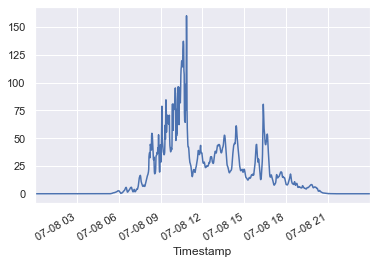

In [279]:
df_ceil = df.InsideCeiling

display(df_ceil.head())
print('Type of df_ceil: ')
display(type(df_ceil))

df_ceil.loc['2019-07-08'].plot()


# IV. Ratio in/out

- klarer Himmel mit Sonne
- bedeckter Himmel = TQ

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,ratio
Timestamp,,,,,,,,,
2019-07-08 06:00:52,740.0,1210.0,2.70,8.5,4.1,38.0,8.51,4.06,0.364865
2019-07-08 06:02:02,700.0,1180.0,2.49,7.9,3.8,32.0,7.86,3.79,0.355714
2019-07-08 06:03:12,600.0,1100.0,2.11,6.6,3.2,28.0,6.63,3.21,0.351667


Text(0.5, 0, 'Zeit')

Text(0, 0.5, 'Verhältnis [%]')

OutsideVert       6591.697192
OutsideHor       17592.515263
InsideCeiling       26.593382
InsideTable         80.634432
InsideWork          38.363370
InsideEye           64.731380
InsideTable2        80.607924
InsideWork2         38.360012
ratio                0.419207
dtype: float64

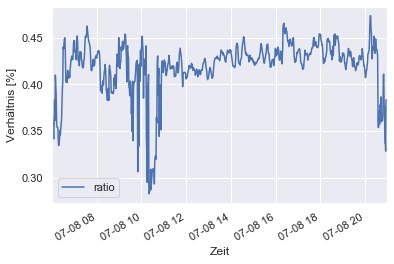

In [47]:
# Add column with ratio

# create copy to avoid error because overwriting slice of df!
df_ratio = df0.loc['2019-07-08 06:00:00' : '2019-07-08 21:00:00'].copy()

# calculate ratio
df_ratio['ratio'] = df_ratio['InsideCeiling']/df_ratio['OutsideVert']*100
df_ratio.head(3)

ax = df_ratio.plot(y='ratio',grid=True)
ax.set_xlabel("Zeit")
ax.set_ylabel("Verhältnis [%]")

display(df_ratio.mean())

## Functions for Ratio-Plot

In [52]:
# Function to add ratio column for given day
def df_rat(date_start, date_end):
    df_ratio_ = df0.loc[date_start : date_end].copy()
    df_ratio_['ratio'] = df_ratio_['InsideCeiling']/df_ratio_['OutsideHor']*100
    tq_print(df_ratio_)
    tq_plot(df_ratio_)
    return df_ratio_

def tq_plot(df):
    ax = df.plot(y='ratio',grid=True,figsize=(15,10),title = 'TQ')
    ax.set_xlabel("uhrzeit")
    ax.set_ylabel("Verhältnis [%]")

def tq_print(df):
    display(df.head(2))
    print("Mean of ratio:")
    display(df.ratio.mean())
    print("Variance of ratio:")
    display(df.ratio.var())
    print("Maximum: ")
    display(df.max())
    print("Minimum: ")
    display(df.min())

# V. Tagesauswertungen

Typische Situationen:

- Bedeckter Himmel
- Klarer Himmel mit Sonne


### Bedeckter Himmel

11.02.2019


**Plot outside hor / vert:**

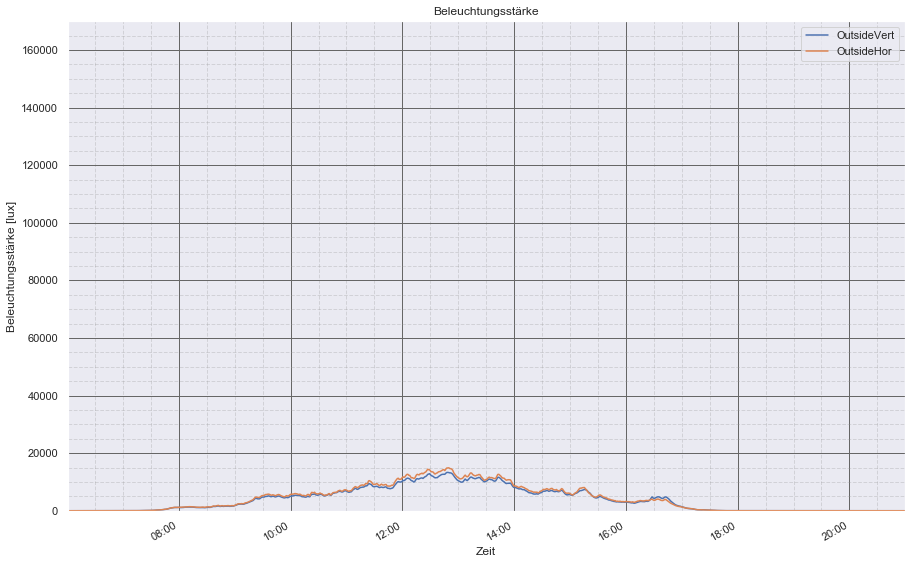

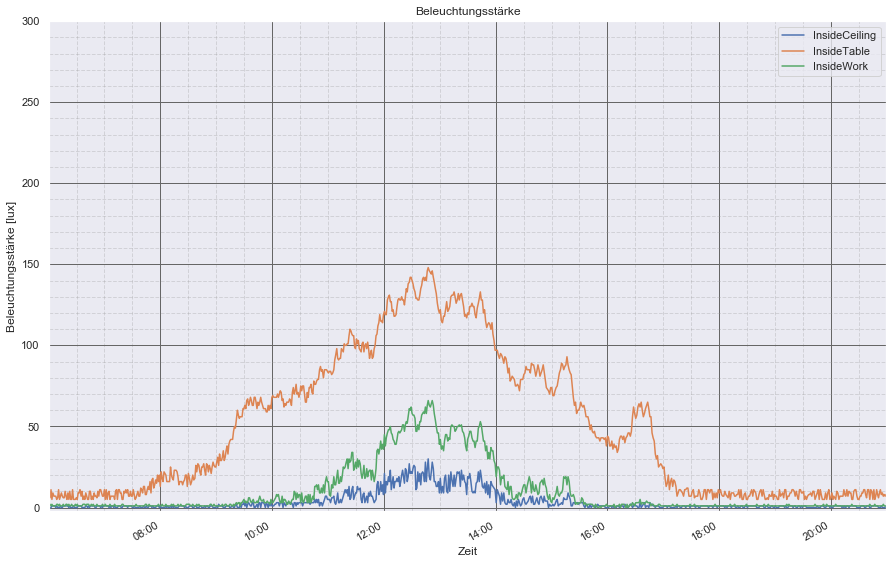

In [51]:
# plot outside (hor / vert)
day_plt('2019-02-11 06:00:00','2019-02-11 21:00:00', 170000, 'OutsideVert','OutsideHor')
# plot inside (work / table /ceiling)# plot inside (work / table /ceiling)
day_plt('2019-02-11 06:00:00','2019-02-11 21:00:00', 300, 'InsideCeiling','InsideTable', 'InsideWork')

**Ratio: Inside/Outside**

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,ratio
Timestamp,,,,,,,,,
2019-02-11 09:00:36,1830.0,1930.0,1.0,28.0,1.0,1.0,NaN,NaN,0.051813
2019-02-11 09:01:36,1970.0,2090.0,0.0,31.0,1.0,0.0,NaN,NaN,0.000000


Mean of ratio:


0.06895132109765159

Variance of ratio:


0.002616545965141719

Maximum: 


OutsideVert      13320.000000
OutsideHor       14910.000000
InsideCeiling       30.000000
InsideTable        148.000000
InsideWork          66.000000
InsideEye           59.000000
InsideTable2              NaN
InsideWork2               NaN
ratio                0.202293
dtype: float64

Minimum: 


OutsideVert      1430.0
OutsideHor       1340.0
InsideCeiling       0.0
InsideTable        24.0
InsideWork          0.0
InsideEye           0.0
InsideTable2        NaN
InsideWork2         NaN
ratio               0.0
dtype: float64

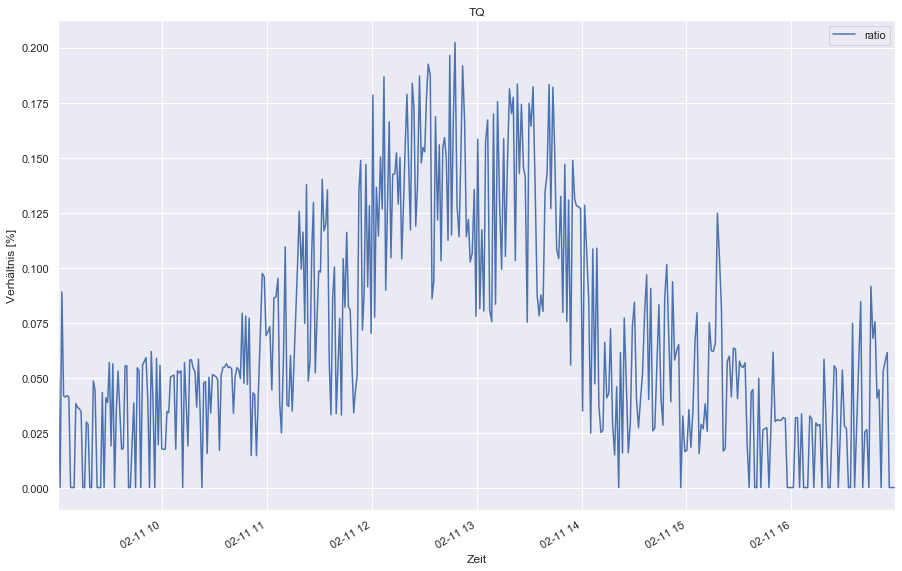

In [50]:
# function gets argument as pandas-timestamp
df_tq = df_rat('2019-02-11 09:00:00','2019-02-11 17:00:00')

### Klarer Himmel mit Sonne

15.02.2019

**Plots**

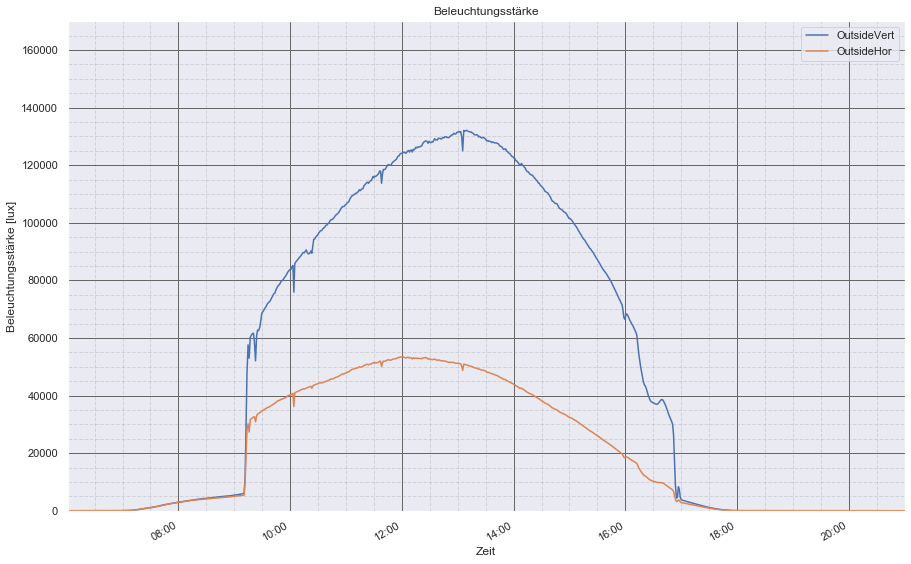

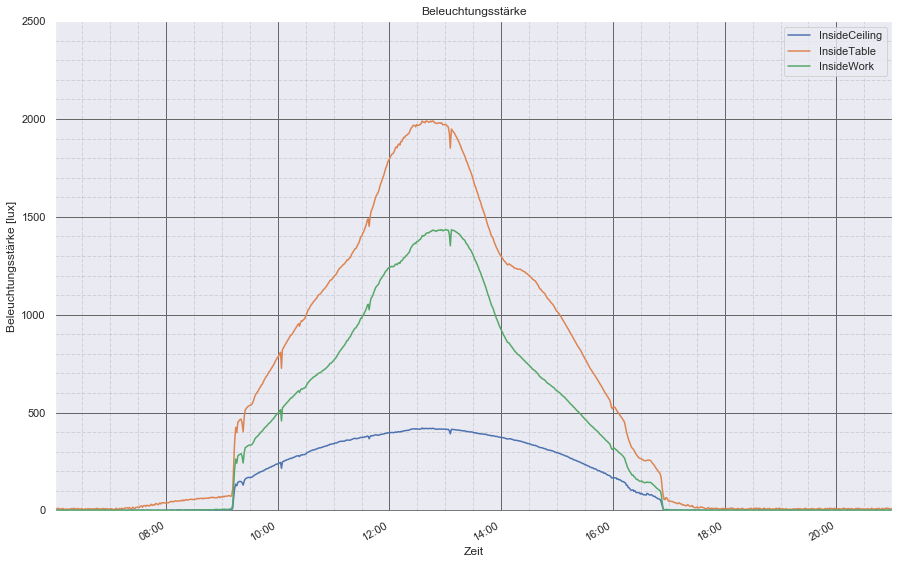

In [53]:
# plot outside (hor / vert)
day_plt('2019-02-15 06:00:00','2019-02-15 21:00:00', 170000, 'OutsideVert','OutsideHor')
# plot inside (work / table /ceiling)
day_plt('2019-02-15 06:00:00','2019-02-15 21:00:00', 2500, 'InsideCeiling','InsideTable', 'InsideWork')

**Ratio: Inside/Outside**

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2,ratio
Timestamp,,,,,,,,,
2019-02-15 09:00:09,5420.0,5010.0,1.0,68.0,6.0,10.0,NaN,NaN,0.01996
2019-02-15 09:01:19,5480.0,5050.0,0.0,72.0,3.0,6.0,NaN,NaN,0.00000


Mean of ratio:


0.7476012213657196

Variance of ratio:


0.032308239762645

Maximum: 


OutsideVert      132100.000000
OutsideHor        53410.000000
InsideCeiling       421.000000
InsideTable        1990.000000
InsideWork         1435.000000
InsideEye           677.000000
InsideTable2               NaN
InsideWork2                NaN
ratio                 0.910992
dtype: float64

Minimum: 


OutsideVert      3860.0
OutsideHor       2850.0
InsideCeiling       0.0
InsideTable        47.0
InsideWork          1.0
InsideEye           4.0
InsideTable2        NaN
InsideWork2         NaN
ratio               0.0
dtype: float64

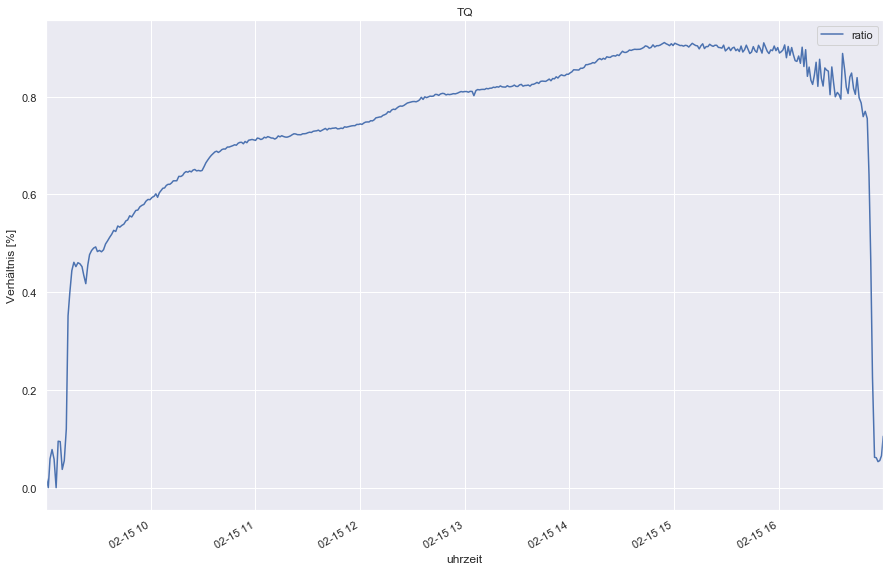

In [55]:
date_start = pd.Timestamp(2019, 2, 15, 9) 
date_end = pd.Timestamp(2019, 2, 15, 17)

df_tq2 = df_rat('2019-02-15 09:00:00','2019-02-15 17:00:00')


## Find cloudy days

In [63]:
dg = df0.groupby(df0.index.date).max() # new np array containing MAX values of the DAY (grouped by date)

#series = dg.OutsideHor < 40000
dg.loc[dg['OutsideHor'] < 20000]

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2
2018-10-27,5200.0,12390.0,10.0,66.0,19.0,24.0,NaN,NaN
2018-11-26,7100.0,17400.0,18.0,88.0,32.0,29.0,NaN,NaN
2018-11-27,10990.0,19590.0,31.0,142.0,77.0,62.0,NaN,NaN
2018-12-02,14660.0,19400.0,50.0,183.0,105.0,80.0,NaN,NaN
2018-12-10,8390.0,12050.0,16.0,110.0,46.0,35.0,NaN,NaN
2018-12-30,5800.0,13220.0,5.0,76.0,22.0,15.0,NaN,NaN
2018-12-31,7050.0,7730.0,12.0,95.0,30.0,24.0,NaN,NaN
2019-01-02,13720.0,14920.0,32.0,151.0,70.0,57.0,NaN,NaN
2019-01-05,8189.0,5150.0,10.0,102.0,27.0,21.0,NaN,NaN
2019-01-06,10580.0,15810.0,37.0,163.0,82.0,66.0,NaN,NaN


In [292]:
dg.loc['2019']

KeyError: '2019'

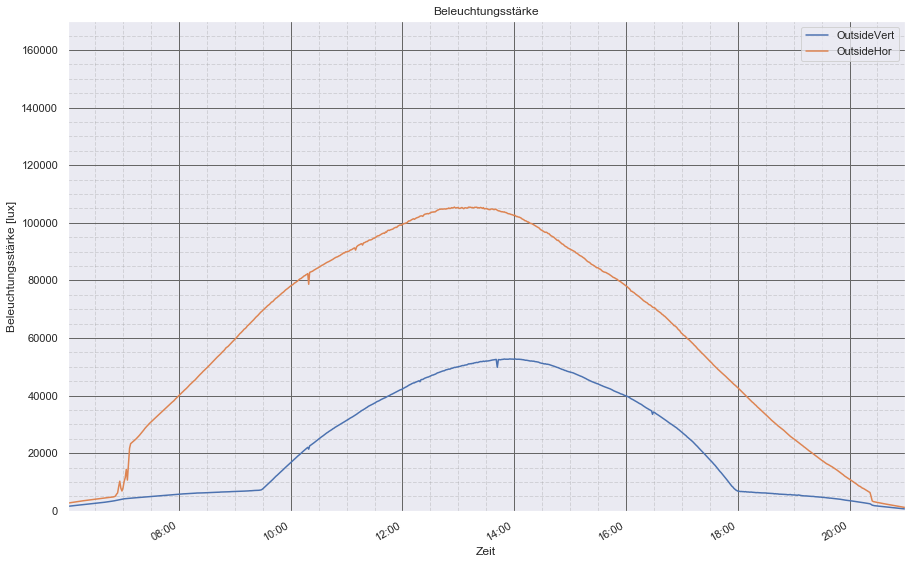

In [65]:
#date_start = pd.Timestamp(2019, 6, 29, 4) 
#date_end = pd.Timestamp(2019, 6, 29, 23)

day_plt('2019-06-29 06:00:00','2019-06-29 21:00:00', 170000, 'OutsideVert','OutsideHor')

# Summenkurven 


## Tagesweise:
**Klarer Himmel mit Sonne:**

In [66]:
df0.loc["2019-07-11"].head(2)
print(df0.loc["2019-07-11"].max())

,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,InsideTable2,InsideWork2
Timestamp,,,,,,,,
2019-07-11 00:00:58,10.0,0.0,0.03,0.0,0.0,26.0,0.0,0.0
2019-07-11 00:02:08,10.0,0.0,0.00,0.0,0.0,25.0,0.0,0.0


OutsideVert       41510.00
OutsideHor       100130.00
InsideCeiling       159.65
InsideTable         412.10
InsideWork          219.90
InsideEye           206.00
InsideTable2        412.10
InsideWork2         219.91
dtype: float64


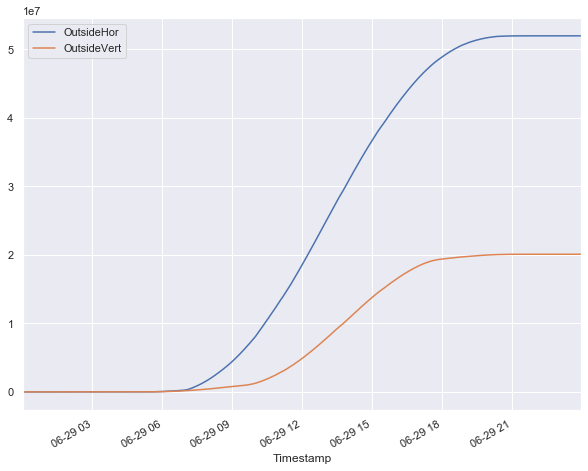

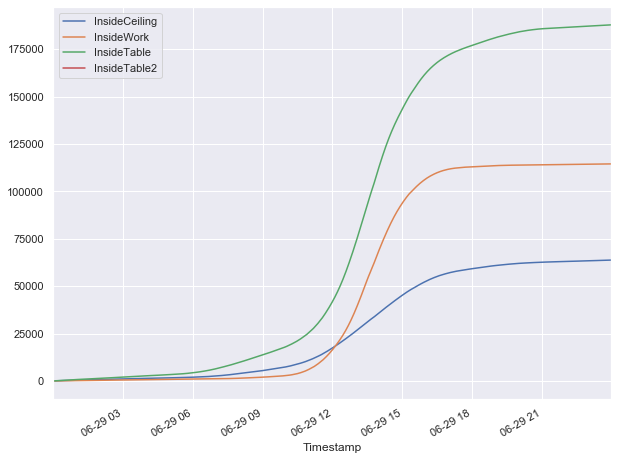

In [67]:
df0.loc["2019-06-29"][["OutsideHor","OutsideVert"]].cumsum().plot(figsize = (10,8), grid = True)
df0.loc["2019-06-29"][["InsideCeiling","InsideWork","InsideTable","InsideTable2"]].cumsum().plot(figsize = (10,8), grid = True)

**Bedeckter Himmel**

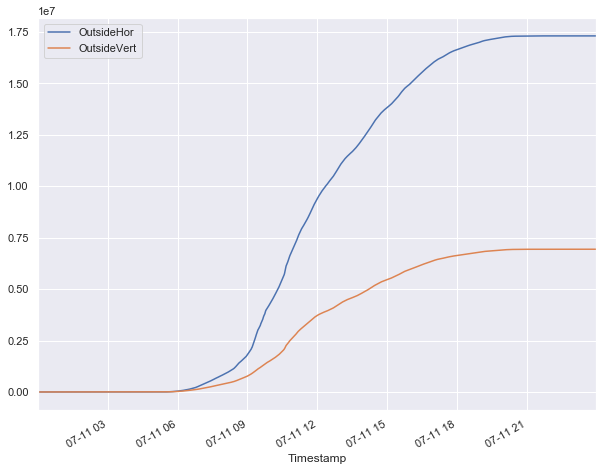

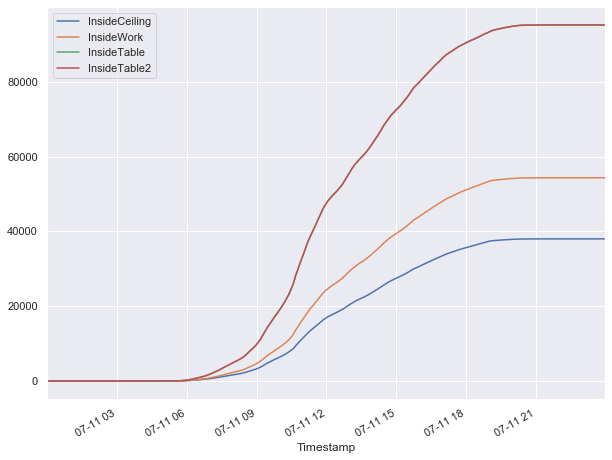

In [68]:
df0.loc["2019-07-11"][["OutsideHor","OutsideVert"]].cumsum().plot(figsize = (10,8), grid = True)
df0.loc["2019-07-11"][["InsideCeiling","InsideWork","InsideTable","InsideTable2"]].cumsum().plot(figsize = (10,8), grid = True)

## Monatesweise:


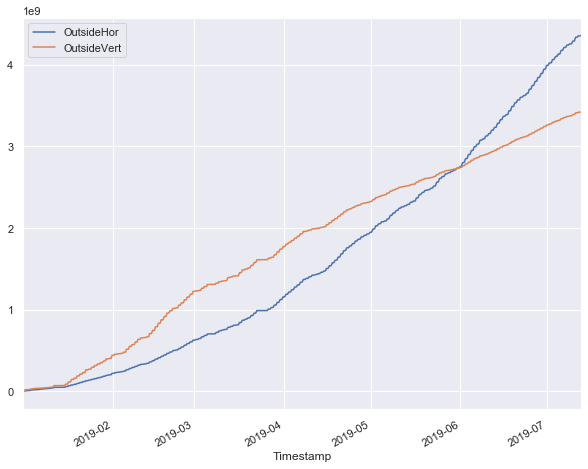

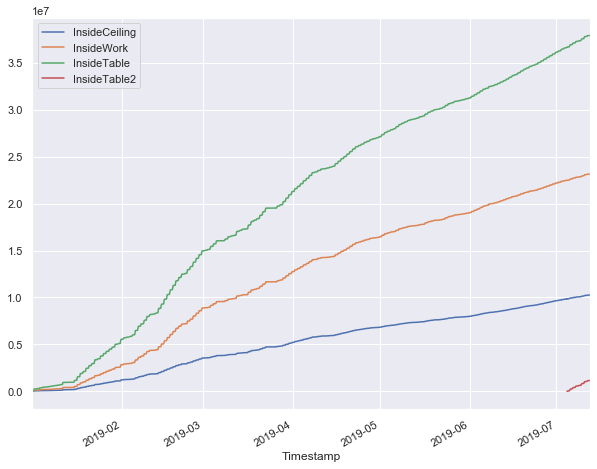

In [69]:
df0.loc["2019"][["OutsideHor","OutsideVert"]].cumsum().plot(figsize = (10,8), grid = True)
df0.loc["2019"][["InsideCeiling","InsideWork","InsideTable","InsideTable2"]].cumsum().plot(figsize = (10,8), grid = True)

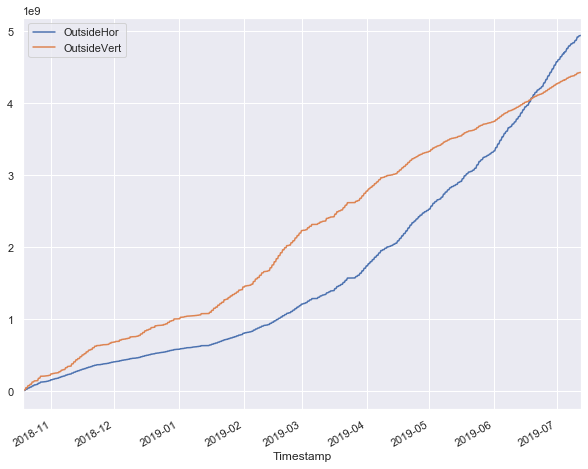

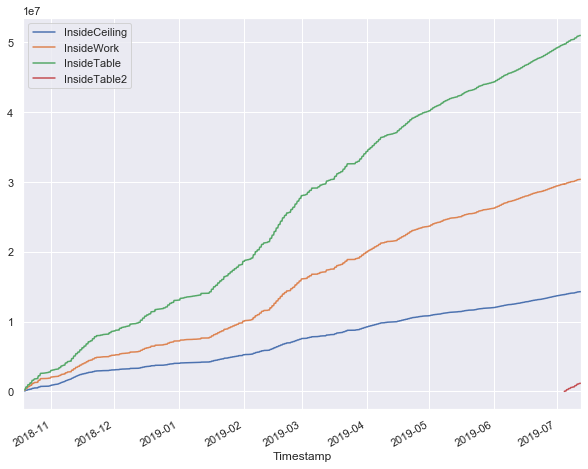

In [71]:
df0[["OutsideHor","OutsideVert"]].cumsum().plot(figsize = (10,8), grid = True)
df0[["InsideCeiling","InsideWork","InsideTable","InsideTable2"]].cumsum().plot(figsize = (10,8), grid = True)

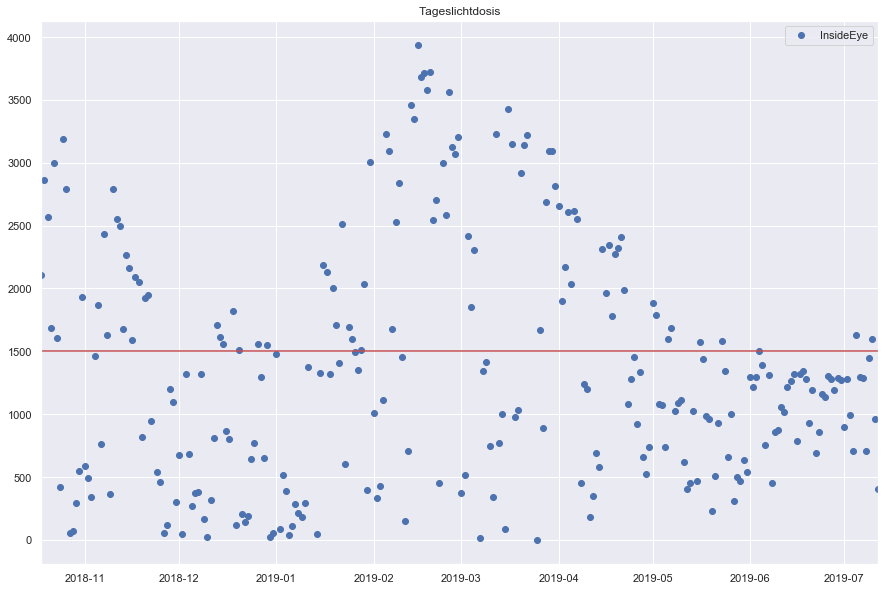

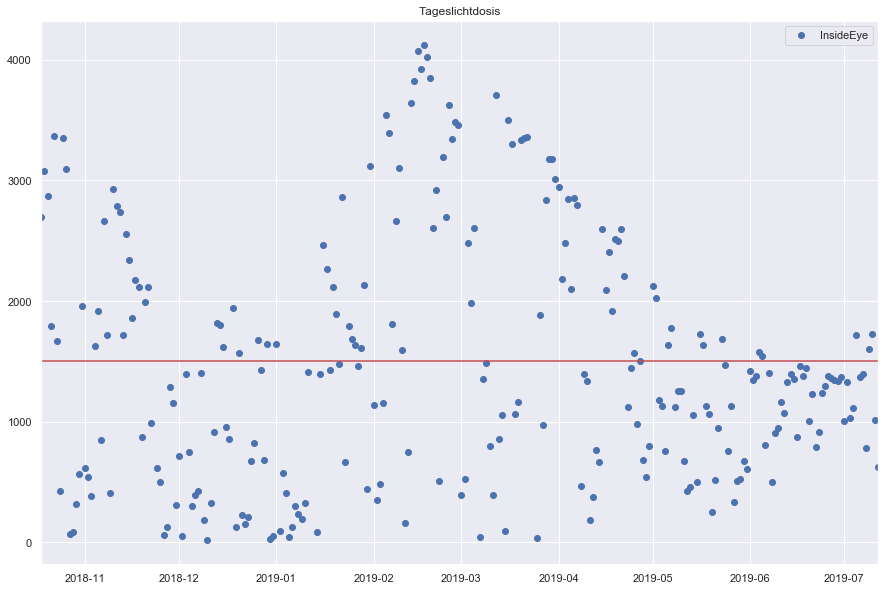

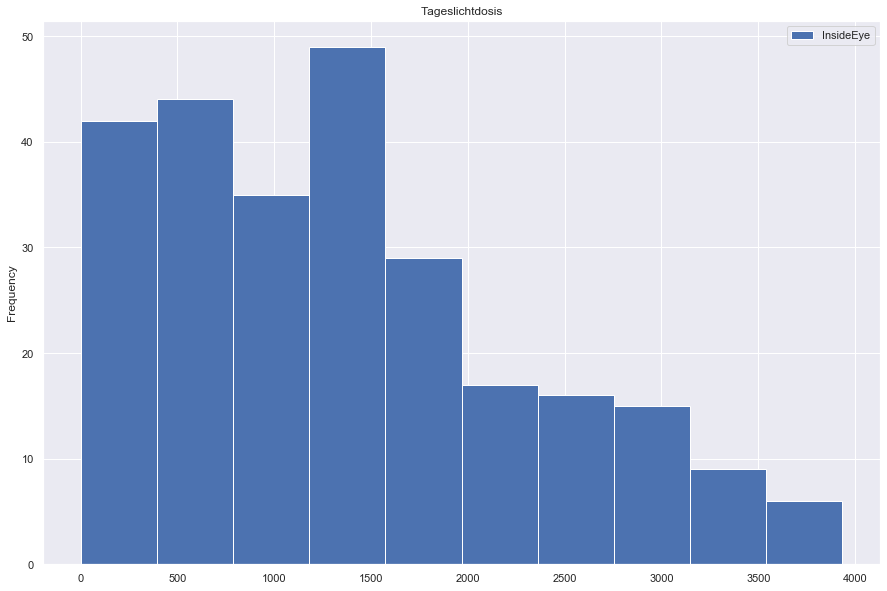

In [280]:
# Tageslichtdosis
# Set Periode each day to 8:00-18:00
df1 = df0.between_time('8:00','18:00')

# df1.sum()
dl_dosis = df1.groupby(df1.index.date).sum()/(60)
dl_dosis2 = df1.groupby(df1.index.date).mean()*10

# plot sns.scatterplot not working with timestamps
dl_dosis.plot(y=['InsideEye'],grid=True, figsize=(15,10),title = 'Tageslichtdosis',linestyle='None', marker='o')
plt.axhline(y=1500, color='r')

dl_dosis2.plot(y=['InsideEye'],grid=True, figsize=(15,10),title = 'Tageslichtdosis',linestyle='None', marker='o')
plt.axhline(y=1500, color='r')

# plot histogram
# fig, ax = plt.subplots()
dl_dosis.plot(y=['InsideEye'], kind='hist', grid=True, figsize=(15,10), title = 'Tageslichtdosis')

#sns.distplot(dl_dosis['InsideEye'],hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))


(array([0.005, 0.005, 0.005, 0.005, 0.005, 0.01 , 0.01 , 0.01 , 0.01 ,
        0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
        0.01 , 0.01 , 0.015, 0.015, 0.015, 0.015, 0.015, 0.015, 0.015,
        0.02 , 0.02 , 0.025, 0.025, 0.03 , 0.03 , 0.035, 0.035, 0.04 ,
        0.04 , 0.04 , 0.04 , 0.04 , 0.04 , 0.04 , 0.05 , 0.05 , 0.05 ,
        0.05 , 0.05 , 0.05 , 0.05 , 0.06 , 0.07 , 0.07 , 0.07 , 0.07 ,
        0.07 , 0.07 , 0.07 , 0.07 , 0.07 , 0.07 , 0.07 , 0.07 , 0.07 ,
        0.075, 0.075, 0.08 , 0.08 , 0.08 , 0.08 , 0.08 , 0.08 , 0.08 ,
        0.08 , 0.08 , 0.085, 0.09 , 0.09 , 0.09 , 0.095, 0.1  , 0.105,
        0.11 , 0.11 , 0.115, 0.115, 0.12 , 0.125, 0.125, 0.125, 0.135,
        0.15 , 0.155, 0.155, 0.155, 0.16 , 0.165, 0.165, 0.175, 0.175,
        0.175, 0.185, 0.19 , 0.195, 0.205, 0.21 , 0.21 , 0.21 , 0.21 ,
        0.21 , 0.21 , 0.21 , 0.215, 0.215, 0.215, 0.215, 0.22 , 0.23 ,
        0.235, 0.24 , 0.245, 0.255, 0.255, 0.265, 0.265, 0.265, 0.265,
      

AttributeError: 'list' object has no attribute 'max'

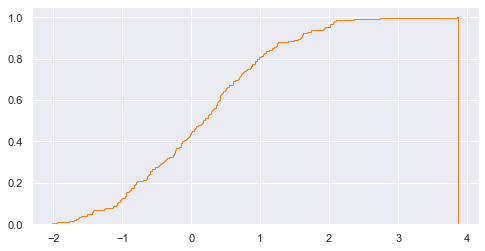

In [196]:
fig, ax = plt.subplots(figsize=(8, 4))

liste = dl_dosis2['InsideEye'].tolist()
#n, bins, patches = ax.hist(liste, bins=500, density=True, histtype='step',cumulative=True, label='Empirical')
#len(liste)
ax.hist(x, bins=500, density=True, histtype='step', cumulative=True, label='Reversed emp.', color='tab:orange')
ax.set_xlim((ax.get_xlim()[0], liste.max()))
plt.show()



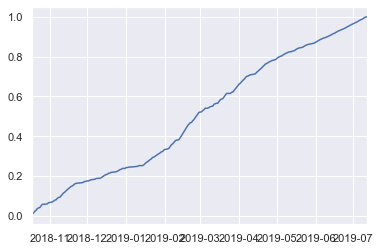

In [197]:
dl_dosis2['pdf'] = dl_dosis2['InsideEye'] / sum(dl_dosis2['InsideEye'])
dl_dosis2['cdf'] = dl_dosis2['pdf'].cumsum()
dl_dosis2['cdf'].plot()

# cDA - calculation

OutsideVert      float64
OutsideHor       float64
InsideCeiling    float64
InsideTable      float64
InsideWork       float64
InsideEye        float64
InsideTable2     float64
InsideWork2      float64
dtype: object

C:\Users\zott.oliver\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zott.oliver\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


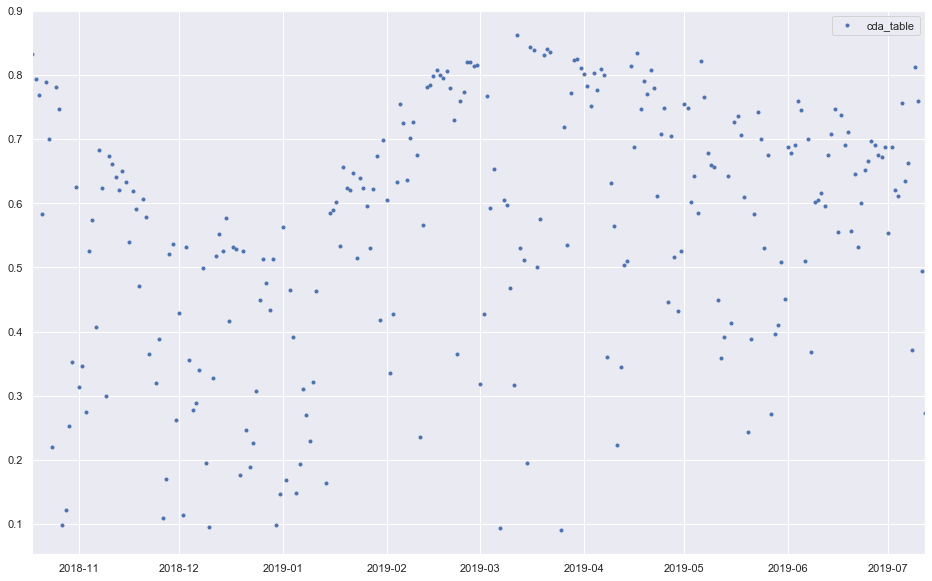

In [305]:
#df_cda_temp = df1['InsideTable'].copy()
#df_cda_temp['cda_temp'] = df_cda_temp['InsideTable']/300
df1.dtypes
df_cda_temp = df1[['InsideTable', 'InsideWork']]

df_cda_temp['cda_table'] = np.where(df_cda_temp['InsideTable']<300, df_cda_temp['InsideTable']/300, 1)
df_cda_temp['cda_work'] = np.where(df_cda_temp['InsideWork']<300, df_cda_temp['InsideWork']/300, 1)
df_cda = df_cda_temp.groupby(df_cda_temp.index.date).mean()
df_cda.plot(y='cda_table', figsize=(16,10),style='.')
df_cda.to_csv("H:/Python_Code/Plot_/cda.csv", sep=';', encoding='utf-8')

# convert index back to datetime index after grouping!
df_cda.index = pd.to_datetime(df_cda.index)



#.apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

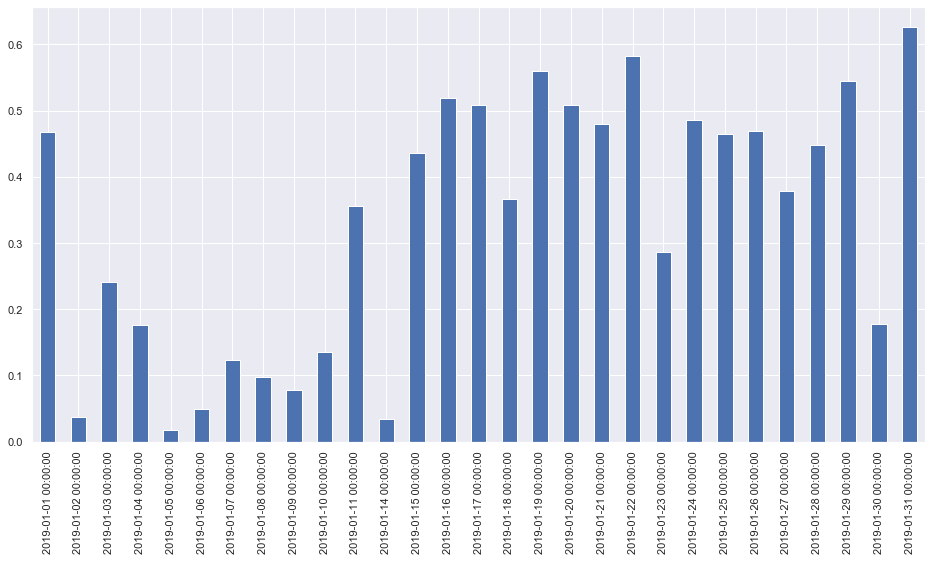

In [315]:
df_cda_month = df_cda.resample('M', convention='end').mean()
df_cda.loc['2019-01']['cda_work'].plot(kind='bar',figsize=(16,8))